## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

У нас имеется некоторый набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID — уникальный идентификатор клиента.
* Year_Birth — год рождения клиента.
* Dt_Customer — дата регистрации клиента на сайте.
* Recency — количество дней с момента последней покупки клиента.
* MntFruits — сумма, потраченная на фрукты за последние два года.
* MntMeatProducts — сумма, потраченная на мясо за последние два года.
* MntFishProducts — сумма, потраченная на рыбу за последние два года.
* MntSweetProducts — сумма, потраченная на сладости за последние два года.
* NumWebPurchases — количество покупок, совершённых через сайт.
* NumStorePurchases — количество покупок, совершённых непосредственно в магазинах.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 — в противном случае.

Необходимо решить задачу кластеризации покупателей, чтобы в дальнейшем планировать маркетинговые акции для каждой группы покупателей. Подготовить результаты своей работы для демонстрации заказчику, не погружённому в машинное обучение.

In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [148]:
df = pd.read_csv('marketing campaign.csv')
df

,ID,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,5524,1957,04-09-2012,58,88,546,172,88,8,4,1
1,2174,1954,08-03-2014,38,1,6,2,1,1,2,0
2,4141,1965,21-08-2013,26,49,127,111,21,8,10,0
3,6182,1984,10-02-2014,26,4,20,10,3,2,4,0
4,5324,1981,19-01-2014,94,43,118,46,27,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,13-06-2013,46,43,182,42,118,9,4,0
2236,4001,1946,10-06-2014,56,0,30,0,0,8,5,0
2237,7270,1981,25-01-2014,91,48,217,32,12,2,13,0
2238,8235,1956,24-01-2014,8,30,214,80,30,6,10,0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Dt_Customer        2240 non-null   object
 3   Recency            2240 non-null   int64 
 4   MntFruits          2240 non-null   int64 
 5   MntMeatProducts    2240 non-null   int64 
 6   MntFishProducts    2240 non-null   int64 
 7   MntSweetProducts   2240 non-null   int64 
 8   NumWebPurchases    2240 non-null   int64 
 9   NumStorePurchases  2240 non-null   int64 
 10  Response           2240 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 192.6+ KB


*В датасете присутсьвует один призк типа 'object' это 'Dt_Customer'.*

In [150]:
print('Количество пропусков по признакам:')
df.isna().sum().sort_values(ascending=False)

Количество пропусков по признакам:


ID                   0
Year_Birth           0
Dt_Customer          0
Recency              0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
NumStorePurchases    0
Response             0
dtype: int64

In [151]:
print('Описательные статистики:')
df.describe()

Описательные статистики:


,ID,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107
std,3246.662198,11.984069,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000
50%,5458.500000,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000
75%,8427.750000,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000
max,11191.000000,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000


*По статистикам видим, что в годе рождения имеюся выбросы, т.к. min значение 1893 г.*

<Axes: >

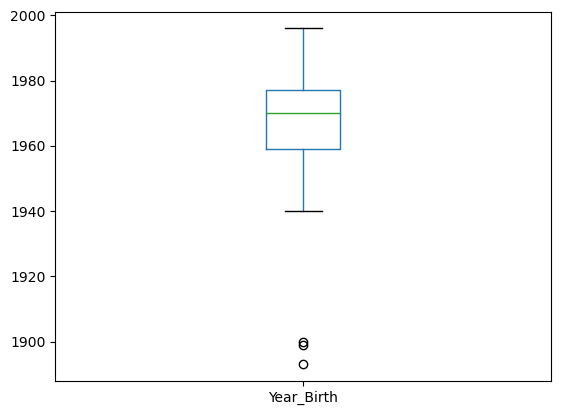

In [152]:
df.boxplot(column=['Year_Birth'], grid= False)

In [153]:
(df['Year_Birth'] < 1940).sum()

3

*Имеются 3 выброса в  признаке 'Year_Birth'.*

In [154]:
col_num = df.select_dtypes(include=np.number).columns.drop('ID').tolist()

Histogram for Year_Birth


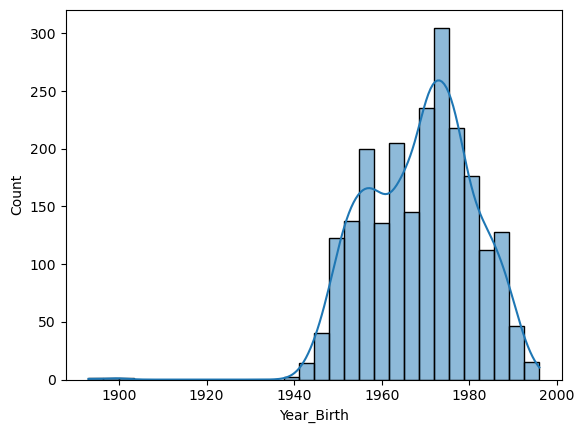

Histogram for Recency


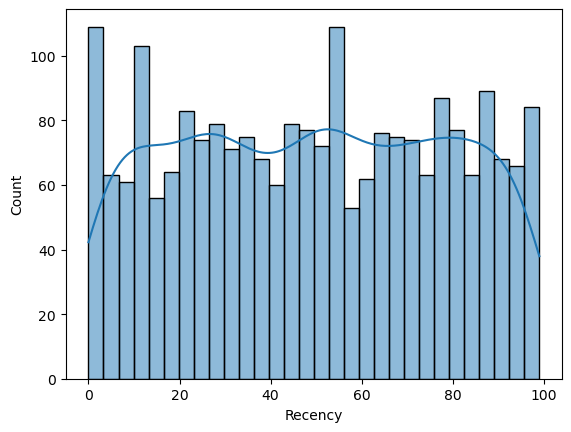

Histogram for MntFruits


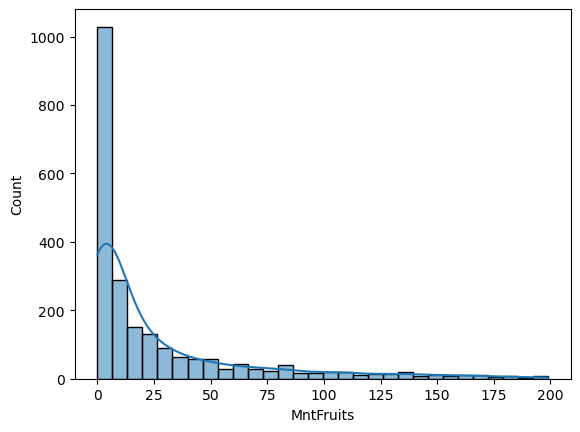

Histogram for MntMeatProducts


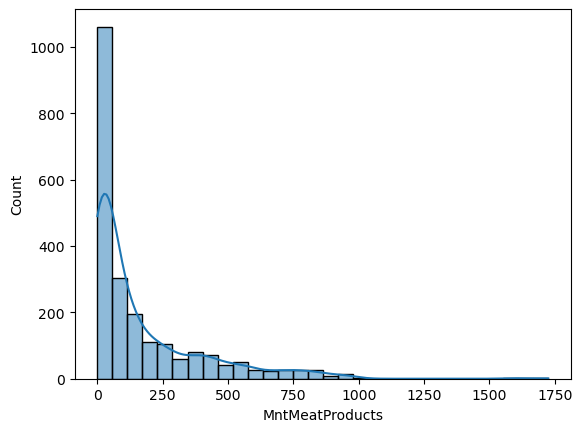

Histogram for MntFishProducts


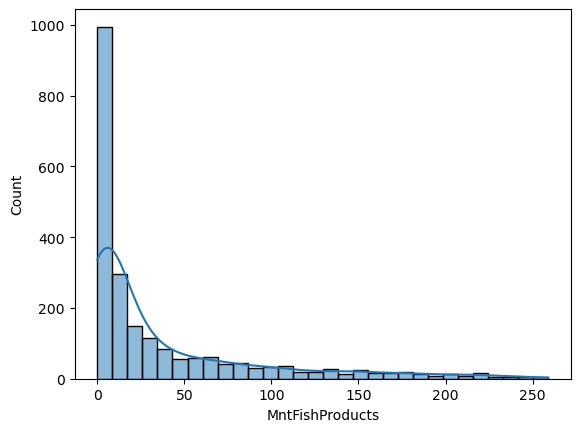

Histogram for MntSweetProducts


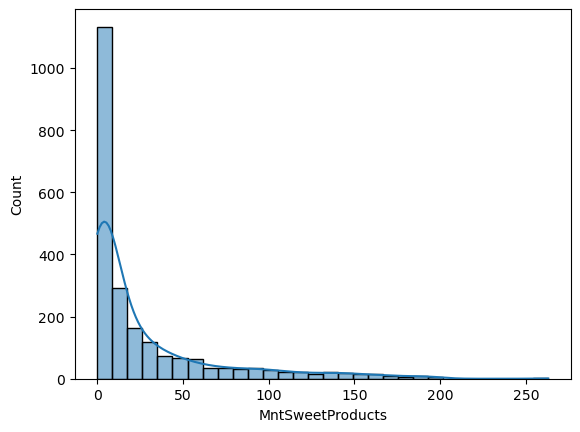

Histogram for NumWebPurchases


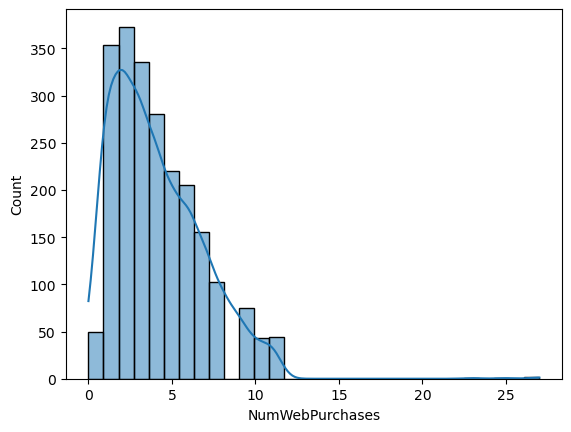

Histogram for NumStorePurchases


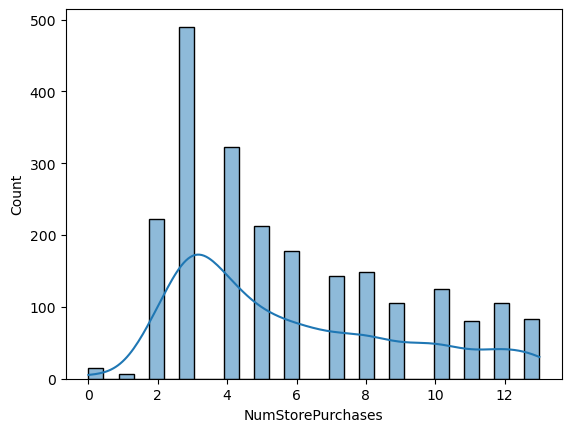

Histogram for Response


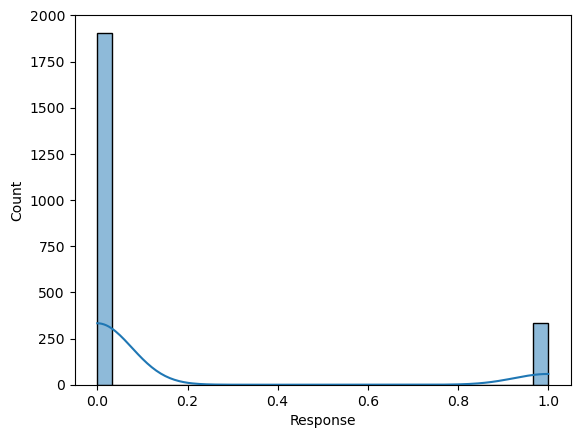

In [155]:
col_num = df.select_dtypes(include=np.number).columns.drop('ID').tolist()

for col in col_num:
  print(f'Histogram for {col}')
  sns.histplot(df[col], bins=30, kde=True)
  plt.show()

- ***Большенство клиентов 1968-1978 года рождения.***
- ***Среднее количество дней с момента последней покупки клиента 50.***
- ***На мясо тратят больше, чем на остальные категории, т.к. порядок суммм больше.***
- ***Количество покупок, совершенных через сайт больше всего от 1 до 5.***
- ***Количество покупок, совершенных непосредственно в магазинах больше всего от 3 до 4.***
- ***Большинство клиентов не учавствовали в последней рекламной компании.***

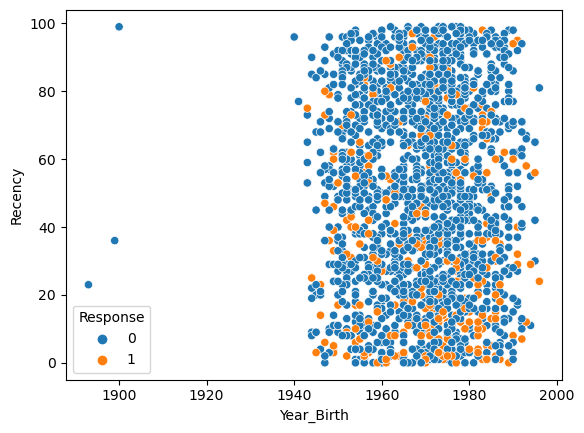

In [57]:
sns.scatterplot(x=df['Year_Birth'], y=df['Recency'], hue=df['Response']);

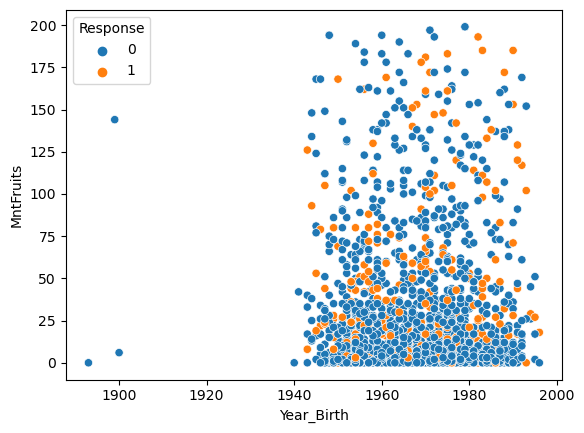

In [58]:
sns.scatterplot(x=df['Year_Birth'], y=df['MntFruits'], hue=df['Response']);

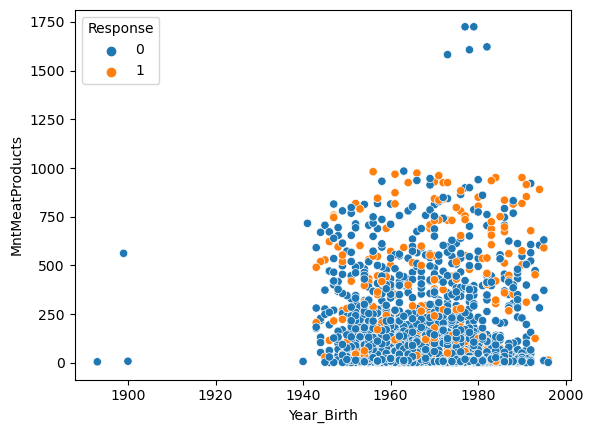

In [59]:
sns.scatterplot(x=df['Year_Birth'], y=df['MntMeatProducts'], hue=df['Response']);

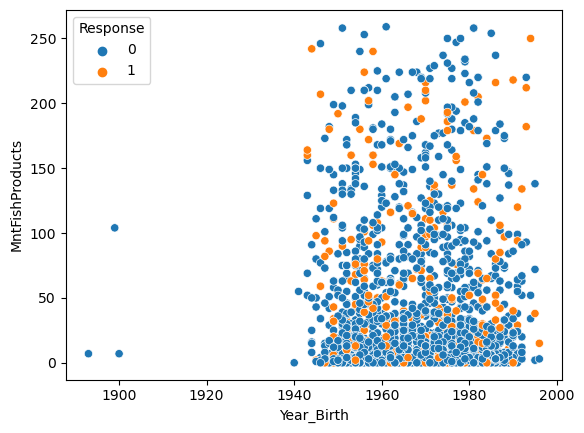

In [60]:
sns.scatterplot(x=df['Year_Birth'], y=df['MntFishProducts'], hue=df['Response']);

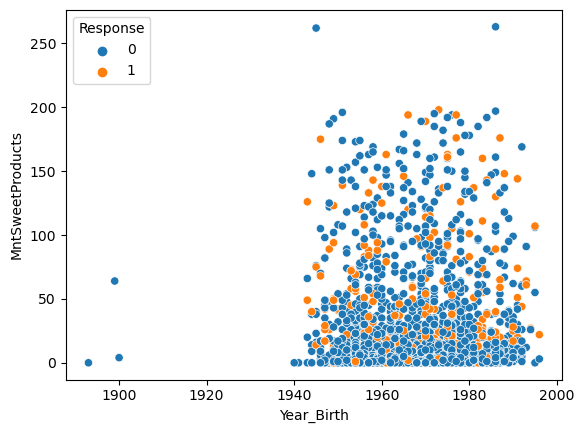

In [61]:
sns.scatterplot(x=df['Year_Birth'], y=df['MntSweetProducts'], hue=df['Response']);

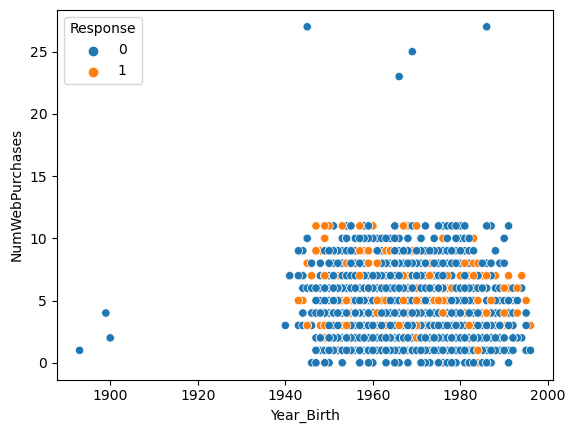

In [62]:
sns.scatterplot(x=df['Year_Birth'], y=df['NumWebPurchases'], hue=df['Response']);

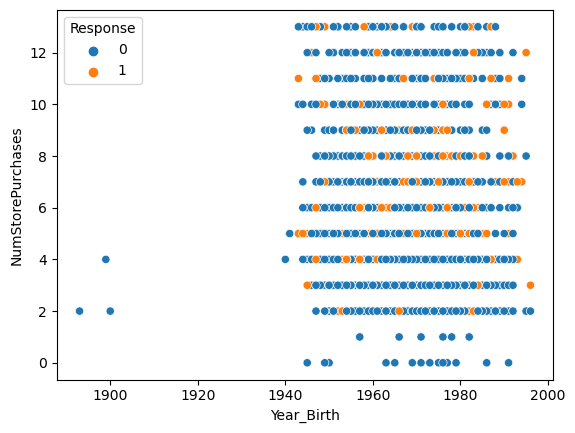

In [63]:
sns.scatterplot(x=df['Year_Birth'], y=df['NumStorePurchases'], hue=df['Response']);

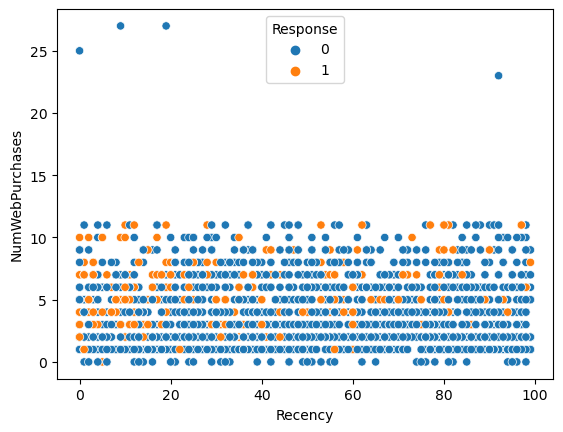

In [64]:
sns.scatterplot(x=df['Recency'], y=df['NumWebPurchases'], hue=df['Response']);

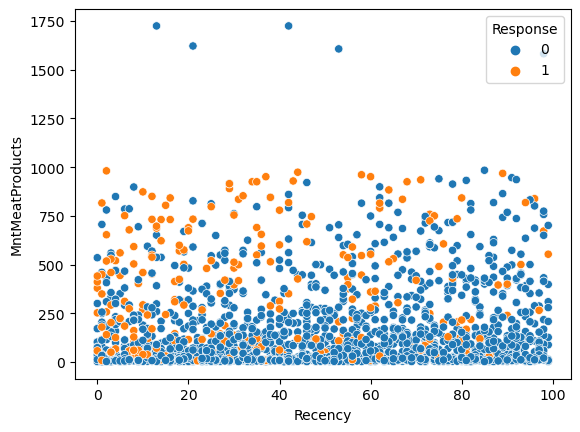

In [65]:
sns.scatterplot(x=df['Recency'], y=df['MntMeatProducts'], hue=df['Response']);

Метод k-средних требует явно задать количество кластеров, на которые будут разбиваться данные. Данных может быть так много, что построение одной модели будет занимать несколько часов, поэтому важно заранее примерно представлять количество кластеров до запуска обучения модели.

На основе проведённого разведочного анализа данных предположить, какое количество кластеров будет оптимальным, визуально не представляется возможным. Предоложим, что взможно 3 или 4 основываясь на покупках.

Выполним очистку и подготовку данных для дальнейшего использования при построении моделей машинного обучения.

In [156]:
df1 = df.copy()

In [157]:
# т.к. из разведовательного анализа выяснилось присутствие выбросов в Year_Birth. то заменим их медианным значением
df1.loc[df1['Year_Birth'] < 1940, 'Year_Birth'] = df1['Year_Birth'].median()

<Axes: >

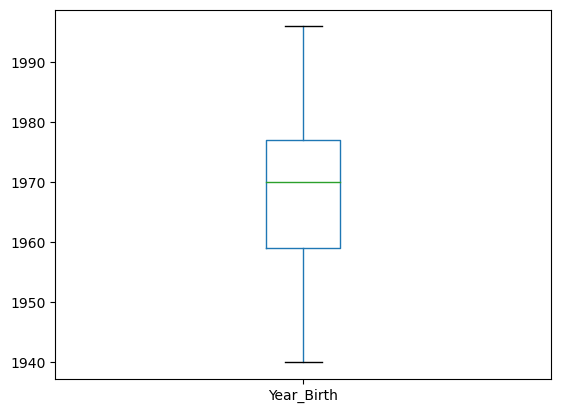

In [158]:
df1.boxplot(column=['Year_Birth'], grid= False)

In [159]:
# переведем колонку Dt_Customer в datetime64
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], format='%d-%m-%Y')

In [160]:
# создадим новый признак-сколько дней клиент является нашим покупателем, преположив, что дата выгрузки 01.01.2015, т.к. данные за последние 2 года и дата регистрации клиентов от 2012 до 2014г.
current_date = pd.to_datetime("01-01-2015", format="%d-%m-%Y")
df1['timeCustomer'] = (current_date - df1['Dt_Customer']).dt.days

In [161]:
# создадим новый признак-общую сумму покупок
df1['TotalMntProducts'] = df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts']

In [162]:
# создадим новый признак-общее количесво покупок
df1['TotalPurchases'] = df1['NumStorePurchases'] + df1['NumWebPurchases']

In [163]:
df1.drop(['ID', 'Dt_Customer'], axis=1, inplace=True)
df1.head()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,timeCustomer,TotalMntProducts,TotalPurchases
0,1957,58,88,546,172,88,8,4,1,849,894,12
1,1954,38,1,6,2,1,1,2,0,299,10,3
2,1965,26,49,127,111,21,8,10,0,498,308,18
3,1984,26,4,20,10,3,2,4,0,325,37,6
4,1981,94,43,118,46,27,5,6,0,347,234,11


In [164]:
print('Описательные статистики:')
df1.describe()

Описательные статистики:


,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,timeCustomer,TotalMntProducts,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.903125,49.109375,26.302232,166.950000,37.525446,27.062946,4.084821,5.790179,0.149107,539.582143,257.840625,9.875000
std,11.694144,28.962453,39.773434,225.715373,54.628979,41.280498,2.778714,3.250958,0.356274,202.122512,312.747814,5.231872
min,1940.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,186.000000,1.000000,0.000000
25%,1959.000000,24.000000,1.000000,16.000000,3.000000,1.000000,2.000000,3.000000,0.000000,366.750000,29.000000,5.000000
50%,1970.000000,49.000000,8.000000,67.000000,12.000000,8.000000,4.000000,5.000000,0.000000,541.500000,101.000000,10.000000
75%,1977.000000,74.000000,33.000000,232.000000,50.000000,33.000000,6.000000,8.000000,0.000000,715.000000,418.250000,14.000000
max,1996.000000,99.000000,199.000000,1725.000000,259.000000,263.000000,27.000000,13.000000,1.000000,885.000000,1728.000000,27.000000


Построим модель кластеризации с помощью метода k-средних. Определим оптимальное количество кластеров с помощью метода локтя и метрики silhouette score.

In [185]:
n_clusters = list(range(2, 9))
metrics = []

for k in n_clusters:
  km = KMeans(n_clusters=k, n_init='auto', random_state=42).fit(df1)
  score = silhouette_score(df1, km.labels_)
  metrics.append(score)

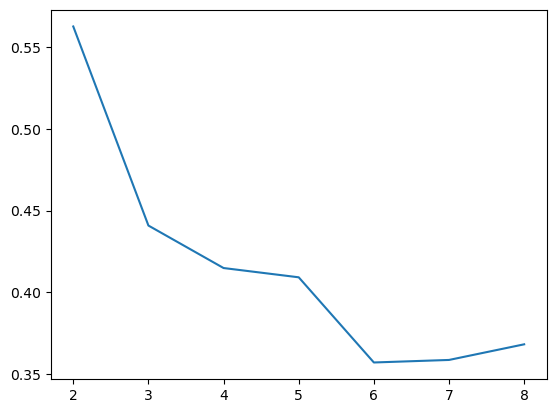

In [186]:
sns.lineplot(x=n_clusters, y=metrics);

***Оптимальное количество кластеров 3.***

In [187]:
km = KMeans(n_clusters=3, n_init='auto', random_state=43).fit(df1)

labels = km.labels_

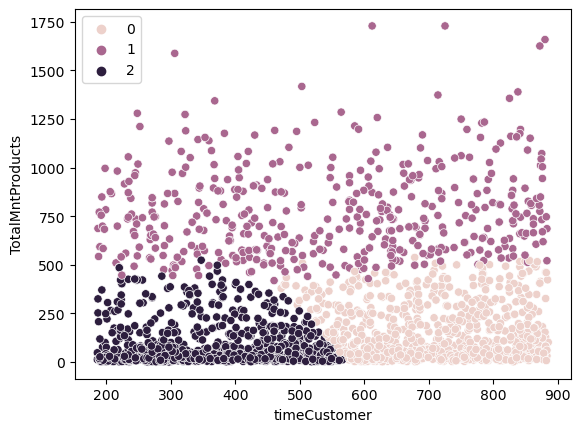

In [188]:
sns.scatterplot(x=df1['timeCustomer'], y=df1['TotalMntProducts'], hue=labels);

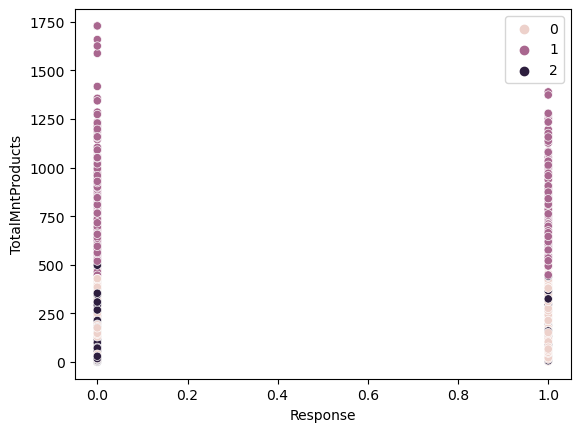

In [189]:
sns.scatterplot(x=df1['Response'], y=df1['TotalMntProducts'], hue=labels);

Визуализируем результаты кластеризации на двумерном графике с помощью метода t-SNE.

In [190]:

# n_components=2 до скольки размерностей понизить датасет
# perplexity=30 сколько точек данных будем считать ближайшими к каждой точке данных, для кучности точек в группах
tsne = TSNE(n_components=2, perplexity=30, random_state=43)
df_emb = tsne.fit_transform(df1)

data = pd.DataFrame(df_emb)
data

,0,1
0,50.538132,-5.944762
1,-13.861644,44.262394
2,5.628206,1.083215
3,-22.121727,39.465038
4,1.511972,11.404456
...,...,...
2235,15.730574,-2.598473
2236,4.337980,50.995037
2237,8.859254,12.931684
2238,12.035858,10.323986


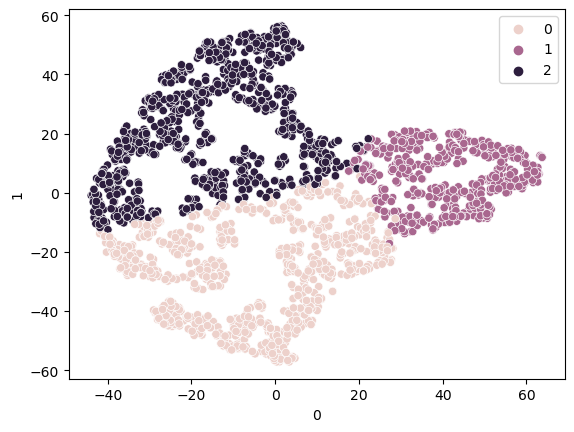

In [191]:
sns.scatterplot(x=data[0], y=data[1], hue=labels);

Построим профили кластеров и опишем их.

In [192]:
df2 = df1.copy()

In [193]:
# добавим в датасет отношение к кластеру

df2['Label'] = labels
df2.head()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,timeCustomer,TotalMntProducts,TotalPurchases,Label
0,1957,58,88,546,172,88,8,4,1,849,894,12,1
1,1954,38,1,6,2,1,1,2,0,299,10,3,2
2,1965,26,49,127,111,21,8,10,0,498,308,18,0
3,1984,26,4,20,10,3,2,4,0,325,37,6,2
4,1981,94,43,118,46,27,5,6,0,347,234,11,2


In [194]:
data_cl = pd.DataFrame(km.cluster_centers_, columns=df1.columns)
data_cl

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,timeCustomer,TotalMntProducts,TotalPurchases
0,1968.626620,49.289753,17.772674,86.528857,25.355713,19.113074,4.428740,5.610130,0.181390,715.590106,148.770318,10.038869
1,1968.582150,50.338742,71.569980,520.308316,103.529412,72.531440,5.261663,8.403651,0.259635,544.906694,767.939148,13.665314
2,1969.340757,48.263920,9.514477,48.989978,12.795100,9.616927,3.113586,4.525612,0.057906,370.255011,80.916481,7.639198


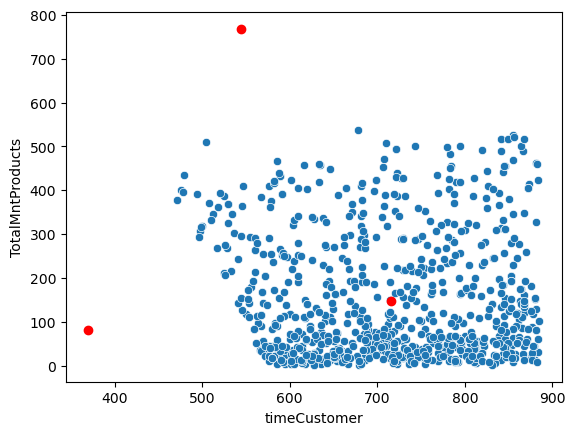

Описание класса: 0

Представителей группы от общего числа клиентов: 37.9 %
Сколько дней клиент является покупателем в среднем: 715
Общие траты в среднем: 148.8
Траты в среднем на мясо: 86.5
Траты в среднем на рыбу: 25.4
Траты в среднем на фрукты: 17.8
Траты в среднем на сладости: 19.1
Количество покупок в среднем: 10.0
Участвовавших в рекламной компании в своей группе: 18.1 %
Участвовавших в рекламной компании от общего числа клиентов: 6.9 %
Средний год рождения: 1968




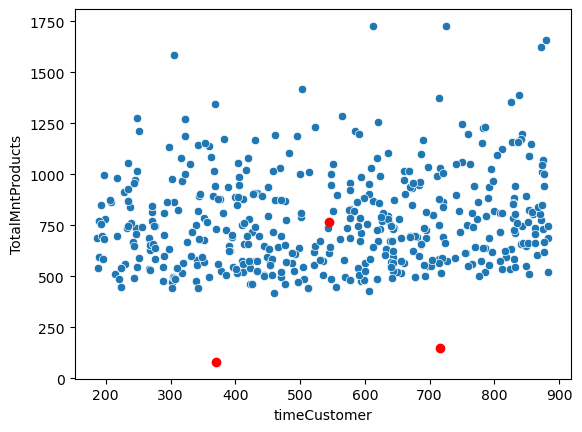

Описание класса: 1

Представителей группы от общего числа клиентов: 22.0 %
Сколько дней клиент является покупателем в среднем: 544
Общие траты в среднем: 767.9
Траты в среднем на мясо: 520.3
Траты в среднем на рыбу: 103.5
Траты в среднем на фрукты: 71.6
Траты в среднем на сладости: 72.5
Количество покупок в среднем: 14.0
Участвовавших в рекламной компании в своей группе: 26.0 %
Участвовавших в рекламной компании от общего числа клиентов: 5.7 %
Средний год рождения: 1968




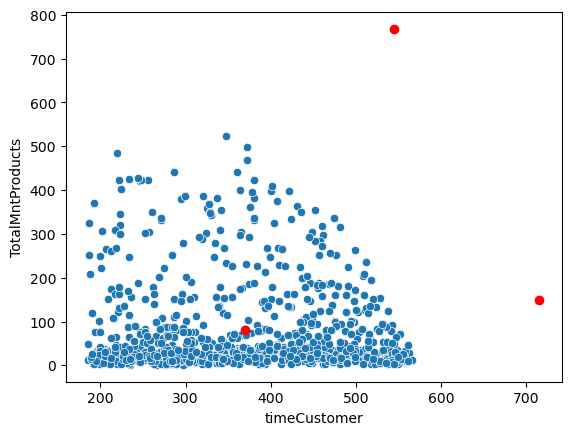

Описание класса: 2

Представителей группы от общего числа клиентов: 40.1 %
Сколько дней клиент является покупателем в среднем: 370
Общие траты в среднем: 80.9
Траты в среднем на мясо: 49.0
Траты в среднем на рыбу: 12.8
Траты в среднем на фрукты: 9.5
Траты в среднем на сладости: 9.6
Количество покупок в среднем: 8.0
Участвовавших в рекламной компании в своей группе: 5.8 %
Участвовавших в рекламной компании от общего числа клиентов: 2.3 %
Средний год рождения: 1969




In [195]:
for i in df2['Label'].sort_values().unique():
    sns.scatterplot(x=df2['timeCustomer'][df2['Label'] == i], y=df2['TotalMntProducts'][df2['Label'] == i])
    plt.scatter(km.cluster_centers_[:, 9] ,km.cluster_centers_[:, 10], color='r')
    plt.show()
    print(f'Описание класса: {i}\n')
    print(f'Представителей группы от общего числа клиентов:', (df2['Label'][df2['Label'] == i].count()*100/df2.shape[0]).round(1), '%')
    print(f"Сколько дней клиент является покупателем в среднем:", int(data_cl['timeCustomer'].iloc[i]))
    print(f"Общие траты в среднем:", data_cl['TotalMntProducts'].iloc[i].round(1))  
    print(f"Траты в среднем на мясо:", data_cl['MntMeatProducts'].iloc[i].round(1))
    print(f"Траты в среднем на рыбу:", data_cl['MntFishProducts'].iloc[i].round(1))
    print(f"Траты в среднем на фрукты:", data_cl['MntFruits'].iloc[i].round(1))
    print(f"Траты в среднем на сладости:", data_cl['MntSweetProducts'].iloc[i].round(1))
    print(f"Количество покупок в среднем:", data_cl['TotalPurchases'].iloc[i].round())                       
#     print(f'Количество участвовавших в рекламной компании:', df2['Label'][(df2['Label'] == i) & (df2['Response'] == 1)].count())
    print(f'Участвовавших в рекламной компании в своей группе:', 
          (df2['Label'][(df2['Label'] == i) & (df2['Response'] == 1)].count()*100/df2['Label'][df2['Label'] == i].count()).round(1), '%')
    print(f'Участвовавших в рекламной компании от общего числа клиентов:', 
          (df2['Label'][(df2['Label'] == i) & (df2['Response'] == 1)].count()*100/df2.shape[0]).round(1), '%')
    print(f'Средний год рождения:', int(data_cl['Year_Birth'].iloc[i]))
    print('\n')

**Визуализируем профили кластеров. Подготовим краткое резюме результатов нашего исследования для заказчика.**

**Визуализируем распределение по кластерам.**

c:\Users\Ser\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



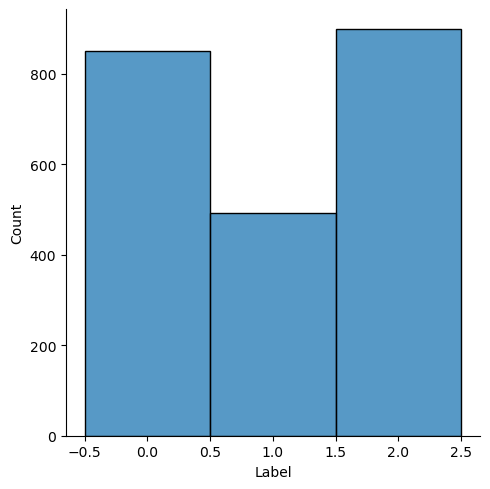

In [196]:
sns.displot(df2['Label'], discrete=True);

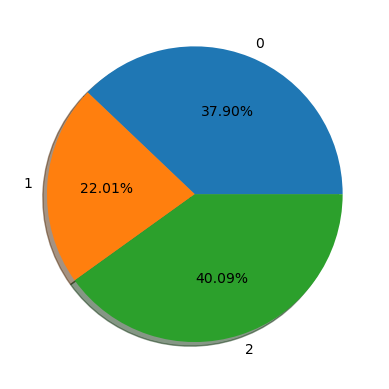

In [197]:
plt.pie(df2['Label'].value_counts().sort_index(ascending=True), labels=df2['Label'].sort_values().unique(), autopct='%1.2f%%', shadow=True)
plt.show()

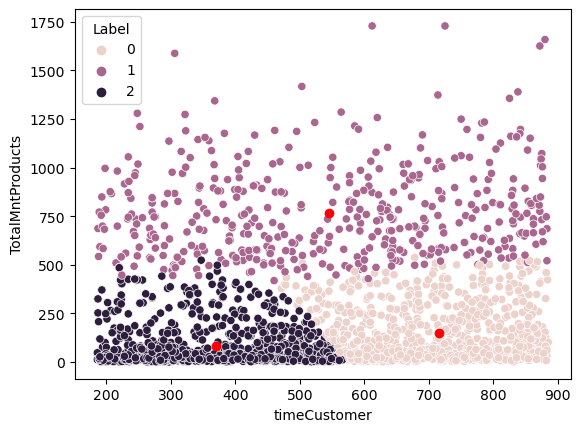

In [198]:
sns.scatterplot(x=df2['timeCustomer'], y=df2['TotalMntProducts'], hue=df2['Label'])
plt.scatter(km.cluster_centers_[:, 9] ,km.cluster_centers_[:, 10], color='r')
plt.show()

In [199]:
features = df2.drop('Label', axis=1).columns

df_g = df2.groupby('Label').agg({x: ['mean'] for x in features}).T
df_g

,Label,0,1,2
Year_Birth,mean,1968.626620,1968.582150,1969.340757
Recency,mean,49.289753,50.338742,48.263920
MntFruits,mean,17.772674,71.569980,9.514477
MntMeatProducts,mean,86.528857,520.308316,48.989978
MntFishProducts,mean,25.355713,103.529412,12.795100
MntSweetProducts,mean,19.113074,72.531440,9.616927
NumWebPurchases,mean,4.428740,5.261663,3.113586
NumStorePurchases,mean,5.610130,8.403651,4.525612
Response,mean,0.181390,0.259635,0.057906
timeCustomer,mean,715.590106,544.906694,370.255011


In [200]:
functions = ['mean']

stat = np.array([[df2[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

,Label,0,1,2,Global
Year_Birth,mean,1968.626620,1968.582150,1969.340757,1968.903125
Recency,mean,49.289753,50.338742,48.263920,49.109375
MntFruits,mean,17.772674,71.569980,9.514477,26.302232
MntMeatProducts,mean,86.528857,520.308316,48.989978,166.950000
MntFishProducts,mean,25.355713,103.529412,12.795100,37.525446
MntSweetProducts,mean,19.113074,72.531440,9.616927,27.062946
NumWebPurchases,mean,4.428740,5.261663,3.113586,4.084821
NumStorePurchases,mean,5.610130,8.403651,4.525612,5.790179
Response,mean,0.181390,0.259635,0.057906,0.149107
timeCustomer,mean,715.590106,544.906694,370.255011,539.582143


In [201]:
# теперь разделим каждый из столбцов соответствующий кластерам на Global
# чтобы узнать во сколько раз отличаются статистики каждого из кластеров от глобальных

cluster_labels = [0, 1, 2]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

,Label,0,1,2,Global
Year_Birth,mean,-0.014044,-0.016302,0.022227,1968.903125
Recency,mean,0.367298,2.503325,-1.721576,49.109375
MntFruits,mean,-32.429029,172.106106,-63.826353,26.302232
MntMeatProducts,mean,-48.170795,211.655176,-70.655898,166.950000
MntFishProducts,mean,-32.430617,175.891219,-65.902870,37.525446
MntSweetProducts,mean,-29.375487,168.010138,-64.464599,27.062946
NumWebPurchases,mean,8.419420,28.810118,-23.776699,4.084821
NumStorePurchases,mean,-3.109559,45.136303,-21.839846,5.790179
Response,mean,21.650692,74.126392,-61.164531,0.149107
timeCustomer,mean,32.619308,0.986792,-31.381159,539.582143


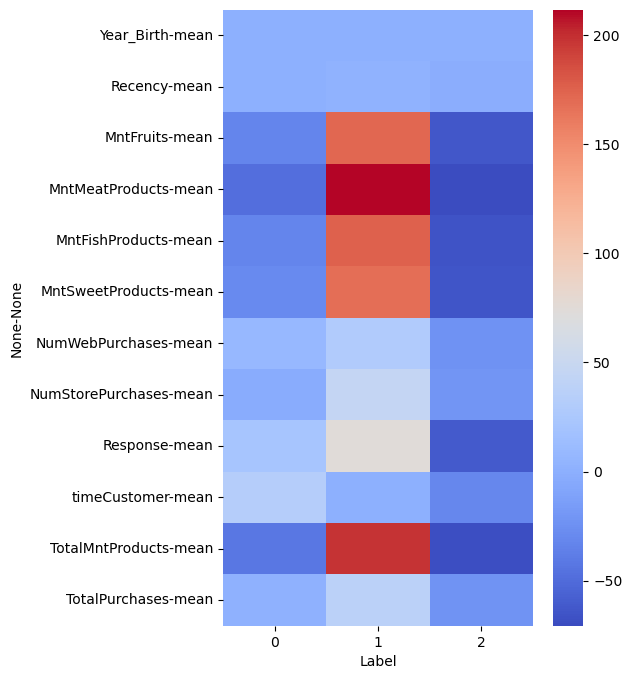

In [202]:
# подсветим max положительные и негативные отклонения от среднего
# поскольку такие отклонения дают больше всего информации о кластере
plt.figure(figsize=(5, 8))
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm');

## Выводы и анализ

***Посмотрим на строки со средними значениями разных оттенков признаков по продуктам, ячеки кластера '1' отличаются от двух других кластеров, что говорит о том, что данная группа покупателей отличается большими тратами, чем все покупатели в среднем. Покупатели из кластера '1' покупают мяса и рыбы больше всего. Покупатели из кластера '2' потратили меньше, чем все покупатели в среднем, а из класера '0' примерно также как и все в среднем.***

***Также покупатели из кластера '1' совершили больше покупок, чем покупатели кластера 0 и 2. Клиенты класса '1' совершили покупку в среднем 50 дней назад, в отличии от класса '0' и '2' 49 и 48 соответственно.***

***Покупатели из кластера '1' являются клиентами около 1,5 лет, но их меньше всего 22%, кластера '2' около 1 года, кластера '0' больше 2,5 лет их примерно по-ровну.***

***По отклику на последнюю рекламную компанию доля болше по классу '1', также велика доля класса '0' по отношению к общему количеству клиентов.***

***Резюмируя выше сказанное:***

- ***Основные клиенты магазина, приносящие больше всего прибыли клиенты класса "1", составляют 22%, они основная цель рекламной компании.***
- ***Покупатели класса "0" являются постоянными клиентами (т.к. с нами больше всего времени), можем их привлечь дополнительными скидками и за счет индивидуальных предложений.***
- ***Покупатели класса "2" относительно новые клиенты, нужно постараться их удержать за счет пресональных предложений в категориях.***